# Imports

In [1]:
import reXplan as rx
import pandas as pd
import numpy as np
from datetime import date as dt_date

from pandapower.plotting.plotly import simple_plotly, vlevel_plotly, pf_res_plotly
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandapower.plotting.plotly import simple_plotly, vlevel_plotly, pf_res_plotly
from utils import * # pplotting functions

import warnings
warnings.simplefilter("ignore") # warning are ignored for now

# Network initialization

In [2]:
simulationName = 'basic_example_tim';
network = rx.network.Network(simulationName);
simulation = rx.simulation.Sim(simulationName);

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Simulation:	Start = 0; Stop = 1000; Duration = 1000 timesteps.
Hazard:		Start = 144; Stop = 160; Duration = 16 timesteps. 


# Plot fragility curves

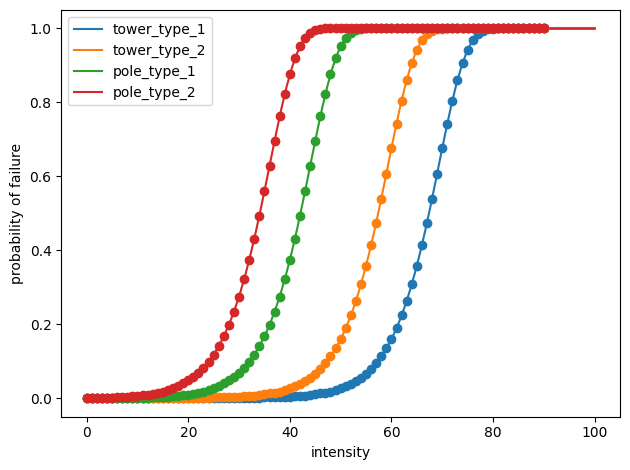

In [3]:
xnew = np.linspace(0, 100, num=100, endpoint=True)
fig, ax = rx.fragilitycurve.plotFragilityCurves(network.fragilityCurves, xnew)

# Simulations

### -> Hazards???

In [4]:
network.event.hazardFromStaticInput('static_event.nc',
                                    max_intensity=90, max_radius=100,
                                    sdate = dt_date(2022,4,1), edate = dt_date(2022,4,3),
                                    geodata1 = rx.network.GeoData(47.4,5.8), geodata2 = rx.network.GeoData(54.9,15.0),
                                    delta_km=10,
                                    epicenter_lat=50, epicenter_lon=9,
                                    frequency='1H', epicenter_radius=1, epicenter_intensity=1)
simulation.initialize_model_sh(network, mc_iterations=10)

,HV2 Line 1,HV2 Line 10,HV2 Line 100,HV2 Line 101,HV2 Line 102,HV2 Line 103,HV2 Line 104,HV2 Line 105,HV2 Line 106,HV2 Line 107,HV2 Line 108,HV2 Line 11,HV2 Line 112,HV2 Line 113,HV2 Line 13,HV2 Line 14,HV2 Line 15,HV2 Line 16,HV2 Line 18,HV2 Line 19,HV2 Line 2,HV2 Line 20,HV2 Line 21,HV2 Line 22,HV2 Line 23,HV2 Line 24,HV2 Line 25,HV2 Line 26,HV2 Line 27,HV2 Line 28,HV2 Line 29,HV2 Line 3,HV2 Line 30,HV2 Line 31,HV2 Line 32,HV2 Line 33,HV2 Line 34,HV2 Line 35,HV2 Line 36,HV2 Line 37,HV2 Line 38,HV2 Line 39,HV2 Line 40,HV2 Line 41,HV2 Line 42,HV2 Line 43,HV2 Line 44,HV2 Line 45,HV2 Line 46,HV2 Line 47,HV2 Line 48,HV2 Line 49,HV2 Line 50,HV2 Line 51,HV2 Line 52,HV2 Line 53,HV2 Line 54,HV2 Line 55,HV2 Line 56,HV2 Line 59,HV2 Line 7,HV2 Line 70,HV2 Line 8,HV2 Line 81,HV2 Line 89,HV2 Line 9,HV2 Line 90,HV2 Line 91,HV2 Line 92,HV2 Line 93,HV2 Line 94,HV2 Line 95,HV2 Line 96,HV2 Line 97,HV2 Line 99
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
simulation.initialize_model_rp(network=network, ref_return_period="rp2", iterationNumber=3, maxTotalIteration=100,cv=0.1, nStrataSamples=10000)

x_min = 16.5
x_max = 93.75

Strata  3
Sample size  75
Strata  4
Sample size  35
Strata  5
Sample size  23
Strata  6
Sample size  19
Strata  7
Sample size  16
-----------------
 Kmeans solution 
-----------------
 *** Domain:  1  ***
 Number of strata:  7
 Sample size     :  16
Computations are being done on population data

Number of strata:  7
... of which with only one unit:  0
Input data have been checked and are compliant with requirements

 *** Domain :  1   1
 Number of strata :  10000
 *** Sample cost:  13.58816
 *** Number of strata:  6
 *** Sample size :  13
 *** Number of strata :  6
---------------------------
Strata = 0
Number of samples = 6.0
Intensity samples between 16.68091175208477 and 27.44349746682642

Strata = 1
Number of samples = 6.0
Intensity samples between 27.44652444710509 and 35.206919563439904

Strata = 2
Number of samples = 6.0
Intensity samples between 35.21456103512508 and 40.41602116331347

Strata = 3
Number of samples = 6.0
Intensity samples between 40.

# Sim results

In [6]:
simulation.results.loc[:,:,:,'network',:]

AttributeError: 'NoneType' object has no attribute 'loc'

# RUN

In [ ]:
time = rx.simulation.Time(start = 140, duration = 40)
iterationSet = [1]

In [ ]:

simulation.run(network, iterationSet = iterationSet, time = time, run_type = 'pm_ac_opf', delta = 1e-16, saveOutput = True)

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
for rp in network.returnPeriods.keys():
    sns.lineplot(x=network.returnPeriods[rp].x_data, y=network.returnPeriods[rp].y_data)

In [ ]:
simulation.stratResults

In [ ]:
plt.hist(simulation.samples, density=True, bins=20)
for b in np.append(simulation.stratResults["Upper_X1"].values, simulation.stratResults["Lower_X1"].values[0]):
    plt.axvline(x = b, color = 'r')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

df = simulation.failureProbs[simulation.failureProbs['element type']=='Line']
sns.lineplot(data=df, x='event intensity', y='failure probability', hue='power element')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
simulation.failureProbs[(simulation.failureProbs['element type']=='Generator') & (simulation.failureProbs['iteration']==4)]

## Launching montecarlo simulations
Optimal power flow (40 steps) over 8 montercalo iterations divided into 4 stratas.

In [ ]:

simulation.run(network, iterationSet = None, time = None, run_type = 'pm_ac_opf', delta = 1e-16, saveOutput = True)

In [ ]:
simulation.results.loc[:,:,:,'network',:]

## Iterations metrics

In [ ]:
df = pd.read_csv(rx.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3, 4]) # read database with results
df = filter_non_converged_iterations(df) # filterining non-converged iterations


In [ ]:
df

In [ ]:
df_line = group_by(df, 'sum', 'iteration', 'field', 'type').loc[:,:,'line']
df_line_quantiles = invert(get_quantiles_on_iterations(df_line, [0.05,0.5,0.95]))
df_line = invert(df_line)

In [ ]:
df_montecarlo = pd.read_csv(rx.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3, 4])

### Number of lines in service

In [ ]:
px.line(df_line, x=df_line.index, y = 'in_service', color = 'iteration')

In [ ]:
px.line(df_line_quantiles, x=df_line_quantiles.index, y = 'in_service', color = 'quantile')

In [ ]:
df_load = group_by(filter(df, type = 'load'), 'sum', 'iteration', 'field', 'type')
df_load_quantiles = invert(get_quantiles_on_iterations(df_load, [0.05, 0.25, 0.5, 0.75, 0.95]))
# df_load = invert(df_load) 
# df_load['loss_of_load_p_percentage'] = (df_load['loss_of_load_p_mw'])/df_load['max_p_mw'] *100
df_load_quantiles['loss_of_load_p_percentage'] = (df_load_quantiles['loss_of_load_p_mw'])/df_load_quantiles['max_p_mw'] *100

In [ ]:
px.line(df_load_quantiles, x=df_load_quantiles.index, y = 'loss_of_load_p_percentage', color = 'quantile')

In [ ]:
df_network = invert(filter(df, type = 'network')) # filter network fields and invert for plotting
px.scatter(df_network, x=df_network.index, y= 'energy_not_served_mwh' )

## Montercalo metrics

In [ ]:
df_network_condensed = filter(df, type = 'network').sum(axis = 1) # sum over timesteps

In [ ]:
df_network_condensed_ = invert(df_network_condensed)
px.histogram(df_network_condensed_, x='energy_not_served_mwh', histnorm='probability')

In [ ]:
statistics= df_network_condensed.groupby('field').mean() # average over iterations
EENS = statistics['energy_not_served_mwh']
LOLE = statistics['loss_of_load_p_duration_h']
print(f'EENS : {EENS.round(2)} MWh, LOLE : {LOLE.round(2)} h')

## Survivability
Probability of supplying at minimum percentage of the load.

In [ ]:
crt_loss_of_load = 30 
df_loss_of_load = df.loc[:,:,"loss_of_load_p_percentage","network"]
Survivability = pd.DataFrame(1 - (df_loss_of_load > crt_loss_of_load).sum() / df_loss_of_load.index.levels[0].size, columns = ['base case'])

#df_aux = pd.read_csv(rx.config.path.engineDatabaseFile('basic_example_v1'), index_col = [0, 1, 2, 3, 4])
#df_loss_of_load_aux = df_aux.loc[:,"loss_of_load_p_percentage","network"]
#Survivability['line 10 reinforced'] = 1 - (df_loss_of_load_aux > crt_loss_of_load).sum() / df_loss_of_load_aux.index.levels[0].size

#df_aux = pd.read_csv(rx.config.path.engineDatabaseFile('basic_example_v2'), index_col = [0, 1, 2, 3, 4])
#df_loss_of_load_aux = df_aux.loc[:,"loss_of_load_p_percentage","network"]
#Survivability['line 2 reparing time improved'] = 1 - (df_loss_of_load_aux > crt_loss_of_load).sum() / df_loss_of_load_aux.index.levels[0].size

In [ ]:
px.line(Survivability).update_layout(xaxis_title="time", yaxis_title="Survivability")

In [ ]:
df_line = group_by(filter(df, type = 'line'), 'mean','strata', 'iteration', 'field','id') # mean in this case does not have any effect as the groupying levels are the initial ones
df_line = invert(df_line)
# df_line = df_line.loc[df_line.index > '2022-01-01 12:00:00']

fig = go.Figure() # --> put in a function (?)

ids = df_line['id'].drop_duplicates().to_list()

for id in ids:
    fig.add_trace(go.Violin(x=df_line['id'][df_line['id'] == id],
                            y=df_line['loading_percent'][df_line['id'] == id],
                            name=id,
                            box_visible=False,
                            meanline_visible=True,
                            side='positive',
                            orientation = 'v'
                           )
                 )
fig.update_layout(width=1000, height=500)
fig.show()

In [ ]:
df_bus =invert(filter(df, type = 'bus'))
fig = go.Figure()

ids = df_bus['id'].drop_duplicates().to_list()

for id in ids:
    fig.add_trace(go.Violin(x=df_bus['id'][df_bus['id'] == id],
                            y=df_bus['vm_pu'][df_bus['id'] == id],
                            name=id,
                            #box_visible=True,
                            meanline_visible=True,
                            side='positive',
                            orientation = 'v'
                           )     
                 )
fig.update_layout(width=1000, height = 500)
fig.show()